Parameters, metrics, and artifacts for all models have been successfully logged in MLflow.


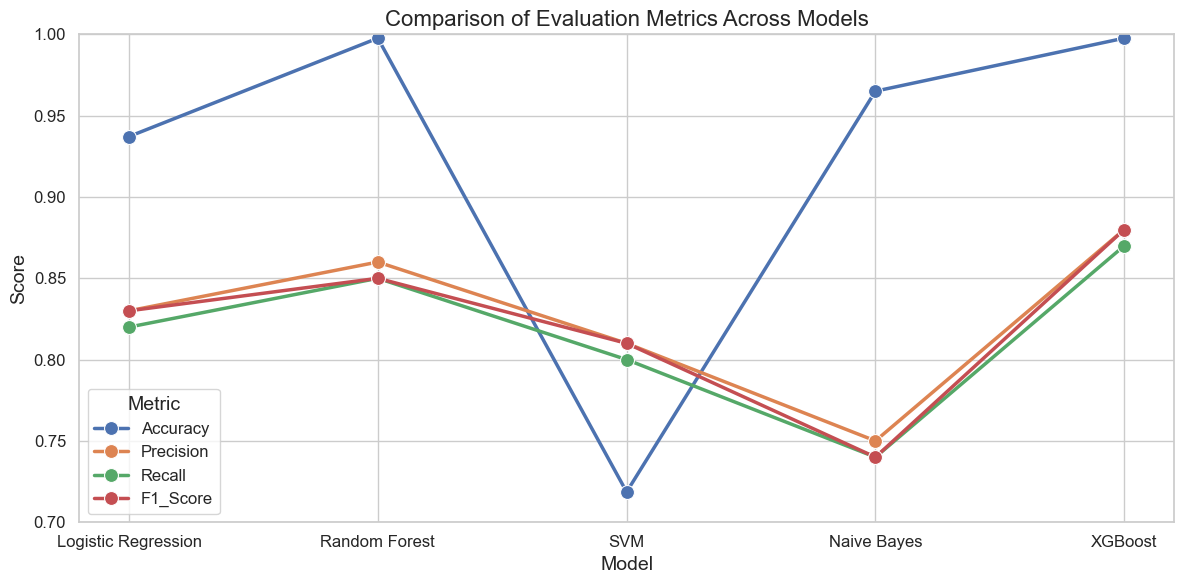

In [7]:
####the latest code for version 1
import mlflow
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the MLflow experiment
mlflow.set_experiment("Alzheimer_Model_Tracking")

# Metrics for each model
metrics = {
    "Logistic Regression": {
        "Accuracy": 0.9372,
        "Precision": 0.83,
        "Recall": 0.82,
        "F1_Score": 0.83
    },
    "Random Forest": {
        "Accuracy": 0.9977,
        "Precision": 0.86,
        "Recall": 0.85,
        "F1_Score": 0.85
    },
    "SVM": {
        "Accuracy": 0.7186,
        "Precision": 0.81,
        "Recall": 0.80,
        "F1_Score": 0.81
    },
    "Naive Bayes": {
        "Accuracy": 0.9651,
        "Precision": 0.75,
        "Recall": 0.74,
        "F1_Score": 0.74
    },
    "XGBoost": {
        "Accuracy": 0.9977,
        "Precision": 0.88,
        "Recall": 0.87,
        "F1_Score": 0.88
    }
}

# Parameters for each model
params = {
    "Logistic Regression": {"max_iter": 500, "solver": "lbfgs"},
    "Random Forest": {"n_estimators": 200, "min_samples_split": 5, "max_depth": 10,"random_state":42},
    "SVM": {"random_state":42},
    "Naive Bayes": {"random_state":42},
    "XGBoost": {"n_estimators": 100, "max_depth": 6, "learning_rate": 0.1}
}



# Artifact paths for models (adjust as needed)
artifact_paths = {
    "Logistic Regression": "Alzheimar_v3.ipynb",
    "Random Forest": "Alzheimar_v3.ipynb",
    "SVM": "Alzheimar_v3.ipynb",
    "Naive Bayes": "Alzheimar_v3.ipynb",
    "XGBoost": "Alzheimar_v3.ipynb"
}

# Function to log parameters, metrics, and artifacts in MLflow
def log_model(run_name, params, metrics, artifact_path=None):
    with mlflow.start_run(run_name=run_name):
        # Log parameters
        for param_name, param_value in params.items():
            mlflow.log_param(param_name, param_value)
        
        # Log metrics
        for metric_name, metric_value in metrics.items():
            mlflow.log_metric(metric_name, metric_value)
        
        # Log artifact if specified
        if artifact_path and os.path.exists(artifact_path):
            mlflow.log_artifact(artifact_path)

# Log each model
for model_name, model_metrics in metrics.items():
    log_model(
        run_name=f"version1_{model_name}",
        params=params[model_name],
        metrics=model_metrics,
        artifact_path=artifact_paths.get(model_name)
    )

print("Parameters, metrics, and artifacts for all models have been successfully logged in MLflow.")


# Run this command in the terminal (not in Jupyter):
# cd C:\Users\ASUS\MLOps
# mlflow ui


# Convert metrics to a DataFrame
metrics_list = []
for model, scores in metrics.items():
    scores["Model"] = model
    metrics_list.append(scores)

metrics_df = pd.DataFrame(metrics_list)

# Melt the DataFrame for line plot
melted_df = metrics_df.melt(id_vars=["Model"], var_name="Metric", value_name="Score")

# Set style
sns.set(style="whitegrid")

# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="Model", y="Score", hue="Metric", data=melted_df, marker="o", markersize=10, linewidth=2.5)
plt.title("Comparison of Evaluation Metrics Across Models", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.ylim(0.7, 1.0)  # Set y-axis limit for better visualization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Metric", title_fontsize=14, fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()




In [9]:
import mlflow
import os
import matplotlib.pyplot as plt

# Set the MLflow experiment
mlflow.set_experiment("Alzheimer_Model_Tracking")

# Define parameters, metrics, and artifacts for each subversion
subversion_data = {
    "Version 2.1": {
        "params": {"method": "SMOTE", "model": "XGBoost", "random_state": "42", "test_size": "0.2"},
        "metrics": {
            "Accuracy": 0.923,
            "Precision": 0.869,
            "Recall": 0.9210,
            "F1_Score": 0.894,
            "ROC_AUC": 0.937
        },
        "artifact_path": os.path.abspath("confusion_matrix_Supervise_SMOTE.png"),
        "notebook_path": os.path.abspath("2_1_Supervise.ipynb")
    },
    "Version 2.2": {
        "params": {"model": "XGBoost", "random_state": "42", "test_size": "0.2"},
        "metrics": {
            "Accuracy": 0.944,
            "Precision": 0.926,
            "Recall": 0.9144,
            "F1_Score": 0.92,
            "ROC_AUC": 0.948
        },
        "artifact_path": os.path.abspath("confusion_matrix_Supervise_XGBoost.png"),
        "notebook_path": os.path.abspath("2_2_Supervise.ipynb")
    },
    "Version 2.3": {
        "params": {"model": "XGBoost", "clustering": "KMeans", "random_state": "42", "test_size": "0.2", "n_components": "2", "n_clusters": 3},
        "metrics": {"Silhouette_Score": 0.313},
        "artifact_path": os.path.abspath("confusion_matrix_Unsupervise_KMeans.png"),
        "notebook_path": os.path.abspath("2_3_Unsupervise.ipynb")
    },
    "Version 2.4": {
        "params": {"model": "XGBoost", "clustering": "KMedoids", "random_state": "42", "test_size": "0.2", "n_clusters": 3, "n_components": "2", "metric": "euclidean"},
        "metrics": {"Silhouette_Score": 0.253},
        "artifact_path": os.path.abspath("confusion_matrix_UnSupervise_KMedoids.png"),
        "notebook_path": os.path.abspath("2_4_Unsupervise.ipynb")
    },
    "Version 2.5": {
        "params": {"model": "XGBoost", "scaler": "Standardize", "clustering": "KMeans", "random_state": "42", "test_size": "0.2", "n_clusters": 3,"n_components":"3"},
        "metrics": {"Silhouette_Score": 0.3651},
        "artifact_path": os.path.abspath("confusion_matrix_UnSupervise_KMeans_Standardize.png"),
        "notebook_path": os.path.abspath("2_5_Unsupervise.ipynb")
    },
    "Version 2.6": {
        "params": {"model": "XGBoost", "scaler": "Standardize", "clustering": "KMedoids", "random_state": "42", "test_size": "0.2", "n_clusters": 3, "metric": "euclidean"},
        "metrics": {"Silhouette_Score": 0.2427},
        "artifact_path": os.path.abspath("confusion_matrix_UnSupervise_ScalerStandardize_KMedoids.png"),
        "notebook_path": os.path.abspath("2_6_Unsupervise.ipynb")
    },
    "Version 2.7": {
        "params": {"model": "XGBoost", "scaler": "Standardize", "clustering": "K-Prototype", "random_state": "42", "test_size": "0.2", "n_clusters": 3, "init": "Cao", "verbose":"0", "gamma " :"1", "n_init": "10"},
        "metrics": {"Silhouette_Score": 0.2510},
        "artifact_path": os.path.abspath("confusion_matrix_Unsupervise_K-Prototype.png"),
        "notebook_path": os.path.abspath("2_7_Unsupervise_KPrototype.ipynb")
    }

}

# Function to log parameters, metrics, and artifacts for each version
def log_subversion(version_name, params, metrics, artifact_path=None, notebook_path=None, dpi=500):
    with mlflow.start_run(run_name=version_name):
        # Log parameters
        for param_name, param_value in params.items():
            mlflow.log_param(param_name, param_value)
        
        # Log metrics
        for metric_name, metric_value in metrics.items():
            mlflow.log_metric(metric_name, metric_value)
        
        # Log the artifact file if it exists
        if artifact_path and os.path.exists(artifact_path):
            width_px, height_px = 600, 500  # Specify width and height in pixels
            figsize = (width_px / dpi, height_px / dpi)  # Convert pixels to inches
            
            plt.figure(figsize=figsize)  # Set figure size (width, height) in inches
            plt.imshow(plt.imread(artifact_path))  # Read and plot the image to verify size
            plt.axis('off')  # Hide axes for better presentation
            plt.savefig(artifact_path, dpi=dpi, bbox_inches='tight')  # Save with specified DPI
            plt.close()
            mlflow.log_artifact(artifact_path)
        
        # Log the associated notebook if it exists
        if notebook_path and os.path.exists(notebook_path):
            mlflow.log_artifact(notebook_path)
        else:
            print(f"Notebook not found: {notebook_path}")

# Log each subversion
for version, data in subversion_data.items():
    log_subversion(
        version_name=version,
        params=data["params"],
        metrics=data["metrics"],
        artifact_path=data.get("artifact_path"),
        notebook_path=data.get("notebook_path")
    )

print("Subversions have been logged successfully in MLflow with parameters, metrics, and artifacts.")



Subversions have been logged successfully in MLflow with parameters, metrics, and artifacts.
